Bellabeat développe des produits de fitness spécialement pour les femmes, incluant :
Application Bellabeat  Fournit des données de santé liées à l'activité, au sommeil, au stress et aux habitudes de pleine
conscience, permettant aux utilisateurs de mieux comprendre leurs habitudes et de prendre des décisions saines. Elle se
connecte également aux autres produits de bien-être intelligents de Bellabeat.
Leaf   Un traqueur de bien-être pouvant être porté en bracelet, collier ou clip, qui se connecte à l'application pour suivre
l'activité, le sommeil et le stress.
Time : Une montre combinant apparence classique et technologie intelligente pour suivre l'activité, le sommeil et le
stress, également connectée à l'application.
Spring : Une bouteille d'eau intelligente qui suit l'apport quotidien en eau pour assurer une bonne hydratation,
connectée à l'application pour suivre les niveaux d'hydratation.
Les cofondateurs de Bellabeat souhaitent analyser les données des dispositifs de fitness pour comprendre l'utilisation
des produits par les consommateurs. Cette analyse vise à orienter de nouvelles stratégies marketing. À la fin de cette
analyse, nous devrons répondre aux trois questions suivantes :
Quelles sont les tendances dans l'utilisation des dispositifs intelligents ?
Comment ces tendances pourraient-elles s'appliquer aux clients de Bellabeat ?
Comment ces tendances pourraient-elles influencer la stratégie marketing de Bellabeat ?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/dailyActivity_merged.csv')
df

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366    4/12/2016       13162       8.500000         8.500000   
1    1503960366    4/13/2016       10735       6.970000         6.970000   
2    1503960366    4/14/2016       10460       6.740000         6.740000   
3    1503960366    4/15/2016        9762       6.280000         6.280000   
4    1503960366    4/16/2016       12669       8.160000         8.160000   
..          ...          ...         ...            ...              ...   
935  8877689391     5/8/2016       10686       8.110000         8.110000   
936  8877689391     5/9/2016       20226      18.250000        18.250000   
937  8877689391    5/10/2016       10733       8.150000         8.150000   
938  8877689391    5/11/2016       21420      19.559999        19.559999   
939  8877689391    5/12/2016        8064       6.120000         6.120000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                         0.0                1.88                      0.55   
1                         0.0                1.57                      0.69   
2                         0.0                2.44                      0.40   
3                         0.0                2.14                      1.26   
4                         0.0                2.71                      0.41   
..                        ...                 ...                       ...   
935                       0.0                1.08                      0.20   
936                       0.0               11.10                      0.80   
937                       0.0                1.35                      0.46   
938                       0.0               13.22                      0.41   
939                       0.0                1.82                      0.04   

     LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                   6.06                     0.00                 25   
1                   4.71                     0.00                 21   
2                   3.91                     0.00                 30   
3                   2.83                     0.00                 29   
4                   5.04                     0.00                 36   
..                   ...                      ...                ...   
935                 6.80                     0.00                 17   
936                 6.24                     0.05                 73   
937                 6.28                     0.00                 18   
938                 5.89                     0.00                 88   
939                 4.25                     0.00                 23   

     FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0                     13                   328               728      1985  
1                     19                   217               776      1797  
2                     11                   181              1218      1776  
3                     34                   209               726      1745  
4                     10                   221               773      1863  
..                   ...                   ...               ...       ...  
935                    4                   245              1174      2847  
936                   19                   217              1131      3710  
937                   11                   224              1187      2832  
938                   12                   213              1127      3832  
939                    1                   137               770      1849  

[940 rows x 15 columns]

1. ActivityDate : La date de l'activité enregistrée.
2. TotalSteps : Le nombre total de pas effectués durant la journée.
3. LoggedActivitiesDistance : Distance des activités enregistrées manuellement.
4. VeryActiveDistance : Distance parcourue pendant les activités très intenses.
5. VeryActiveMinutes : Minutes passées dans des activités très intenses
SedentaryActiveDistance: se réfère à la distance que quelqu'un a parcourue même pendant des moments d'inactivité ou de très faible activité physique, comme lorsqu'ils sont assis ou allongés. Cela peut sembler contradictoire, mais cela inclut tous les petits mouvements que nous faisons même en restant globalement  
sédentaires, comme se lever pour prendre un verre d'eau ou alleraux toilettes.

how many distinct user IDs there are:

In [3]:
df.Id.nunique()

33

Maintenant on analyse les informations de base des données : nombre de lignes et de colonnes, noms des
colonnes, nombre de valeurs non nulles, type de données.
D'après les observations ci-dessus, nous avons noté que :
* Il y a aucune valeurs nulles ou manquantes comme indiqué sous le
"Non-Null Count".
* Les données comportent 15 colonnes et 940 lignes.
* La colonne "ActivityDate" est mal classée en tant que type de données objet et doit être convertie en type
datetime64.
* Il y a 33 identifiants uniques.

In [4]:
missing_values_count = df.isnull().sum()
missing_values_count

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [5]:
df.info()
unique_id = len(pd.unique(df["Id"]))

print("# of unique Id: " + str(unique_id))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

Convertir "ActivityDate" au type datetime64 et formater en aaaa-mm-jj

In [6]:
# convert "ActivityDate" to datatime64 dtype and format to yyyy-mm-dd
df["ActivityDate"] = pd.to_datetime(df["ActivityDate"], format="%m/%d/%Y")
# re-print information to confirm
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [7]:
df.describe()

Id                   ActivityDate    TotalSteps  \
count  9.400000e+02                            940    940.000000   
mean   4.855407e+09  2016-04-26 06:53:37.021276672   7637.910638   
min    1.503960e+09            2016-04-12 00:00:00      0.000000   
25%    2.320127e+09            2016-04-19 00:00:00   3789.750000   
50%    4.445115e+09            2016-04-26 00:00:00   7405.500000   
75%    6.962181e+09            2016-05-04 00:00:00  10727.000000   
max    8.877689e+09            2016-05-12 00:00:00  36019.000000   
std    2.424805e+09                            NaN   5087.150742   

       TotalDistance  TrackerDistance  LoggedActivitiesDistance  \
count     940.000000       940.000000                940.000000   
mean        5.489702         5.475351                  0.108171   
min         0.000000         0.000000                  0.000000   
25%         2.620000         2.620000                  0.000000   
50%         5.245000         5.245000                  0.000000   
75%         7.712500         7.710000                  0.000000   
max        28.030001        28.030001                  4.942142   
std         3.924606         3.907276                  0.619897   

       VeryActiveDistance  ModeratelyActiveDistance  LightActiveDistance  \
count          940.000000                940.000000           940.000000   
mean             1.502681                  0.567543             3.340819   
min              0.000000                  0.000000             0.000000   
25%              0.000000                  0.000000             1.945000   
50%              0.210000                  0.240000             3.365000   
75%              2.052500                  0.800000             4.782500   
max             21.920000                  6.480000            10.710000   
std              2.658941                  0.883580             2.040655   

       SedentaryActiveDistance  VeryActiveMinutes  FairlyActiveMinutes  \
count               940.000000         940.000000           940.000000   
mean                  0.001606          21.164894            13.564894   
min                   0.000000           0.000000             0.000000   
25%                   0.000000           0.000000             0.000000   
50%                   0.000000           4.000000             6.000000   
75%                   0.000000          32.000000            19.000000   
max                   0.110000         210.000000           143.000000   
std                   0.007346          32.844803            19.987404   

       LightlyActiveMinutes  SedentaryMinutes     Calories  
count            940.000000        940.000000   940.000000  
mean             192.812766        991.210638  2303.609574  
min                0.000000          0.000000     0.000000  
25%              127.000000        729.750000  1828.500000  
50%              199.000000       1057.500000  2134.000000  
75%              264.000000       1229.500000  2793.250000  
max              518.000000       1440.000000  4900.000000  
std              109.174700        301.267437   718.166862

On va extracter des statistiques pour l'analyse :
* Pas quotidiens moyens :  
Les utilisateurs font en moyenne 7638 pas par jour, ce qui est en dessous des 10 000 pas recommandés par les
National Institutes of Health pour réduire les risques de cancer, de maladies cardiaques et de décès prématuré.
* Minutes d'activité très intense :  
En moyenne, les utilisateurs ont 21,16 minutes d'activité intense par jour, soit 148,12 minutes par semaine. Cela
est inférieur aux 150 minutes par semaine recommandées par les Centers for Disease Control and Prevention
(CDC).
* Temps sédentaire :  
La SCPE recommande de ne pas passer plus de 8 heures par jour en étant sédentaire. Les utilisateurs passent en
moyenne 8,52 heures par jour en étant sédentaires lorsqu'ils sont éveillés, ce qui dépasse légèrement cette
recommandation.
* Calories brûlées  En moyenne, les utilisateurs de FitBit brûlent 2304 calories par jour. Selon la Cleveland Clinic, cela
est supérieur à ce qu'un corps brûlerait typiquement sans activité physique, indiquant donc que ces utilisateurs
pratiquent une certaine forme d'activité physique tout au long de la journée.

À cette étape, nous créons des visualisations et on va communiquer les résultats :

In [8]:
df["ActivityDate"] = pd.to_datetime(df["ActivityDate"], errors='coerce')
df["Day_Of_TheWeek"] = df["ActivityDate"].dt.day_name()
df

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366   2016-04-12       13162       8.500000         8.500000   
1    1503960366   2016-04-13       10735       6.970000         6.970000   
2    1503960366   2016-04-14       10460       6.740000         6.740000   
3    1503960366   2016-04-15        9762       6.280000         6.280000   
4    1503960366   2016-04-16       12669       8.160000         8.160000   
..          ...          ...         ...            ...              ...   
935  8877689391   2016-05-08       10686       8.110000         8.110000   
936  8877689391   2016-05-09       20226      18.250000        18.250000   
937  8877689391   2016-05-10       10733       8.150000         8.150000   
938  8877689391   2016-05-11       21420      19.559999        19.559999   
939  8877689391   2016-05-12        8064       6.120000         6.120000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                         0.0                1.88                      0.55   
1                         0.0                1.57                      0.69   
2                         0.0                2.44                      0.40   
3                         0.0                2.14                      1.26   
4                         0.0                2.71                      0.41   
..                        ...                 ...                       ...   
935                       0.0                1.08                      0.20   
936                       0.0               11.10                      0.80   
937                       0.0                1.35                      0.46   
938                       0.0               13.22                      0.41   
939                       0.0                1.82                      0.04   

     LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                   6.06                     0.00                 25   
1                   4.71                     0.00                 21   
2                   3.91                     0.00                 30   
3                   2.83                     0.00                 29   
4                   5.04                     0.00                 36   
..                   ...                      ...                ...   
935                 6.80                     0.00                 17   
936                 6.24                     0.05                 73   
937                 6.28                     0.00                 18   
938                 5.89                     0.00                 88   
939                 4.25                     0.00                 23   

     FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  \
0                     13                   328               728      1985   
1                     19                   217               776      1797   
2                     11                   181              1218      1776   
3                     34                   209               726      1745   
4                     10                   221               773      1863   
..                   ...                   ...               ...       ...   
935                    4                   245              1174      2847   
936                   19                   217              1131      3710   
937                   11                   224              1187      2832   
938                   12                   213              1127      3832   
939                    1                   137               770      1849   

    Day_Of_TheWeek  
0          Tuesday  
1        Wednesday  
2         Thursday  
3           Friday  
4         Saturday  
..             ...  
935         Sunday  
936         Monday  
937        Tuesday  
938      Wednesday  
939       Thursday  

[940 rows x 16 columns]

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ce code est pour tracer un histogramme représentant le nombre de connexions des utilisateurs à l'application
au cours de la semaine.

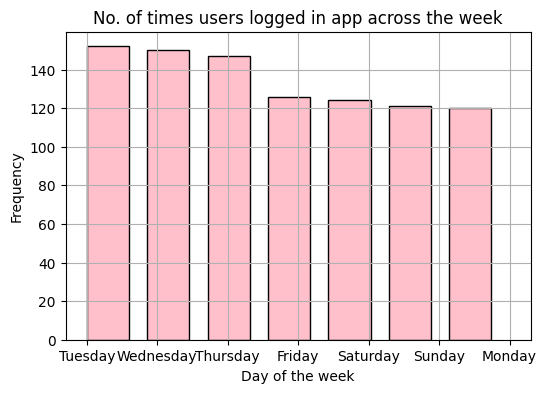

In [19]:
# plotting histogram
plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
plt.hist(df.Day_Of_TheWeek, bins = 7, width = 0.6, color = "pink", edgecolor = "black")
# adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week")
plt.grid(True)
plt.show()


Comme vous pouvez clairement remarquer  les utilisateurs préfèrent, ou se souviennent (en leur accordant le
bénéfice du doute qu'ils ont oublié), de suivre leur activité sur l'application en milieu de semaine, du mardi au
vendredi. Aussi il faut noter que la fréquence diminue le vendredi et continue à baisser durant les week-ends et le
lundi.

**Calories brûlées par pas effectué** On va cree un diagramme de dispersion pour visualiser la relation entre le
nombre de pas effectués et les calories brûlées.

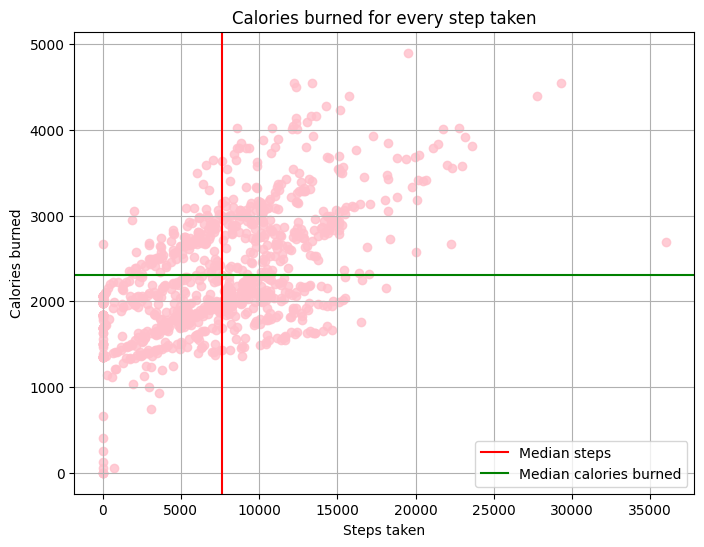

In [20]:
# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(df.TotalSteps, df.Calories,alpha = 0.8,color='pink') # nuage de points ou diagramme de dispersion
# add annotations and visuals
median_calories = 2303
median_steps = 7637
plt.axvline(median_steps, color = "red", label = "Median steps")
plt.axhline(median_calories, color = "green", label = "Median calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every step taken")
plt.grid(True)
plt.legend()
plt.show()

* Il y a une corrélation positive.
* Nous avons observé que l'intensité des calories brûlées augmente lorsque les utilisateurs se trouvent dans une
plage de > 0 à 15 000 pas, avec une diminution du taux de calories brûlées au-delà de 15 000 pas.
Quelques valeurs aberrantes ont été notées :
* Zéro pas avec zéro à un minimum de calories brûlées.
* Une observation de > 35 000 pas avec < 3 000 calories brûlées.
Nous avons déduit que ces valeurs aberrantes pourraient être dues à une variation naturelle des données, à un
changement dans l'utilisation de l'utilisateur ou à des erreurs de collecte des données (par exemple, des erreurs
de calcul, une contamination des données ou une erreur humaine).

**Pourcentage d'activites** ce  graphique en secteurs pour visualiser la répartition des différentes minutes
d'activité (très actives, modérément actives, légèrement actives, sédentaires).

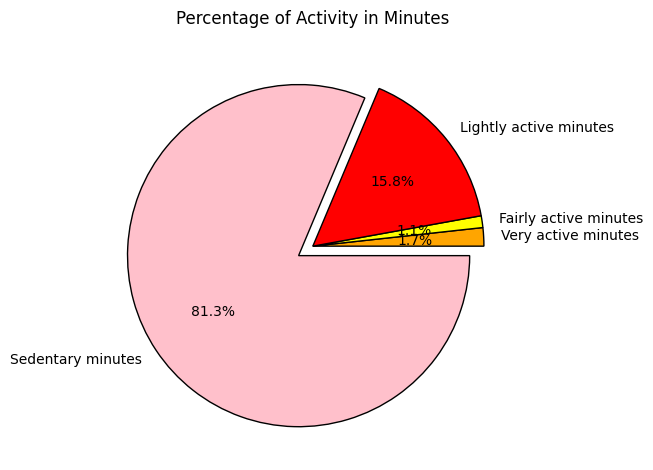

In [23]:
# calculating total of individual minutes column
very_active_mins = df["VeryActiveMinutes"].sum()
fairly_active_mins = df["FairlyActiveMinutes"].sum()
lightly_active_mins = df["LightlyActiveMinutes"].sum()
sedentary_mins = df["SedentaryMinutes"].sum()

# plotting pie chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["Orange", "yellow", "red", "pink"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels,
        colors = colours, wedgeprops = {"edgecolor": "black"},
        explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()


Comme le montre le graphique en secteurs, les minutes sédentaires occupent la plus grande part avec 81,3%. Cela
indique que les utilisateurs utilisent l'application FitBit pour enregistrer des activités quotidiennes telles que les
trajets domicile-travail, les mouvements inactifs (se déplacer d'un endroit à un autre) ou les courses. L'application
est rarement utilisée pour suivre la forme physique (comme la course), comme le montre le faible pourcentage
d'activité modérément active (1,1%) et d'activité très active (1,7%). C'est très décourageant car l'application FitBit
a été développée pour encourager la forme physique.


Et maintenant l'étape la plus important , on va  livrer ensemble les conclusions  et fournir des recommandations
basées sur l'analyse :
1. Quelles sont les tendances identifiées ?
La majorité des utilisateurs (81,3%) utilisent l'application FitBit pour suivre des activités sédentaires et non pour
suivre leurs habitudes de santé.
Les utilisateurs préfèrent suivre leurs activités en semaine par rapport aux week-ends, peut-être parce qu'ils
passent plus de temps à l'extérieur en semaine et restent à la maison le week-end.
2. Comment ces tendances pourraient-elles s'appliquer aux clients de Bellabeat ?
Les deux entreprises développent des produits visant à fournir aux femmes des données sur leur santé, leurs
habitudes et leur forme physique, et les encouragent à comprendre leurs habitudes actuelles et à prendre des
décisions saines. Ces tendances communes concernant la santé et la forme physique peuvent très bien s'appliquer
aux clients de Bellabeat.
3. Comment ces tendances pourraient-elles influencer la stratégie marketing de Bellabeat ?
L'équipe marketing de Bellabeat peut encourager les utilisateurs en les éduquant et en les équipant de
connaissances sur les bienfaits de la forme physique, en leur suggérant différents types d'exercices (par exemple,
un simple exercice de 10 minutes en semaine et un exercice plus intense le week-end) et en leur fournissant des
informations sur l'apport et la combustion des calories via l'application Bellabeat. Le week-end, l'application
Bellabeat peut également envoyer des notifications pour encourager les utilisateurs à faire de l'exercice.